Column: HCHK_YEAR
Mean: 2021.0
Median: 2021.0
----------------------
Column: IDV_ID
Mean: 2500036.592392
Median: 2500198.0
----------------------
Column: SIDO
Mean: 34.008688
Median: 41.0
----------------------
Column: SEX
Mean: 1.499871
Median: 1.0
----------------------
Column: AGE_GROUP
Mean: 11.924016
Median: 12.0
----------------------
Column: HEIGHT
Mean: 161.0466
Median: 160.0
----------------------
Column: WEIGHT
Mean: 63.126275
Median: 60.0
----------------------
Column: WAIST
Mean: 82.08368894618253
Median: 82.0
----------------------
Column: SIGHT_LEFT
Mean: 0.485496439748787
Median: 0.0
----------------------
Column: SIGHT_RIGHT
Mean: 0.48720231248562196
Median: 0.0
----------------------
Column: HEAR_LEFT
Mean: 1.0466528640441684
Median: 1.0
----------------------
Column: HEAR_RIGHT
Mean: 1.0449544963998196
Median: 1.0
----------------------
Column: BP_HIGH
Mean: 124.79993451904237
Median: 124.0
----------------------
Column: BP_LWST
Mean: 76.672873254051
Median: 77.0
----

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


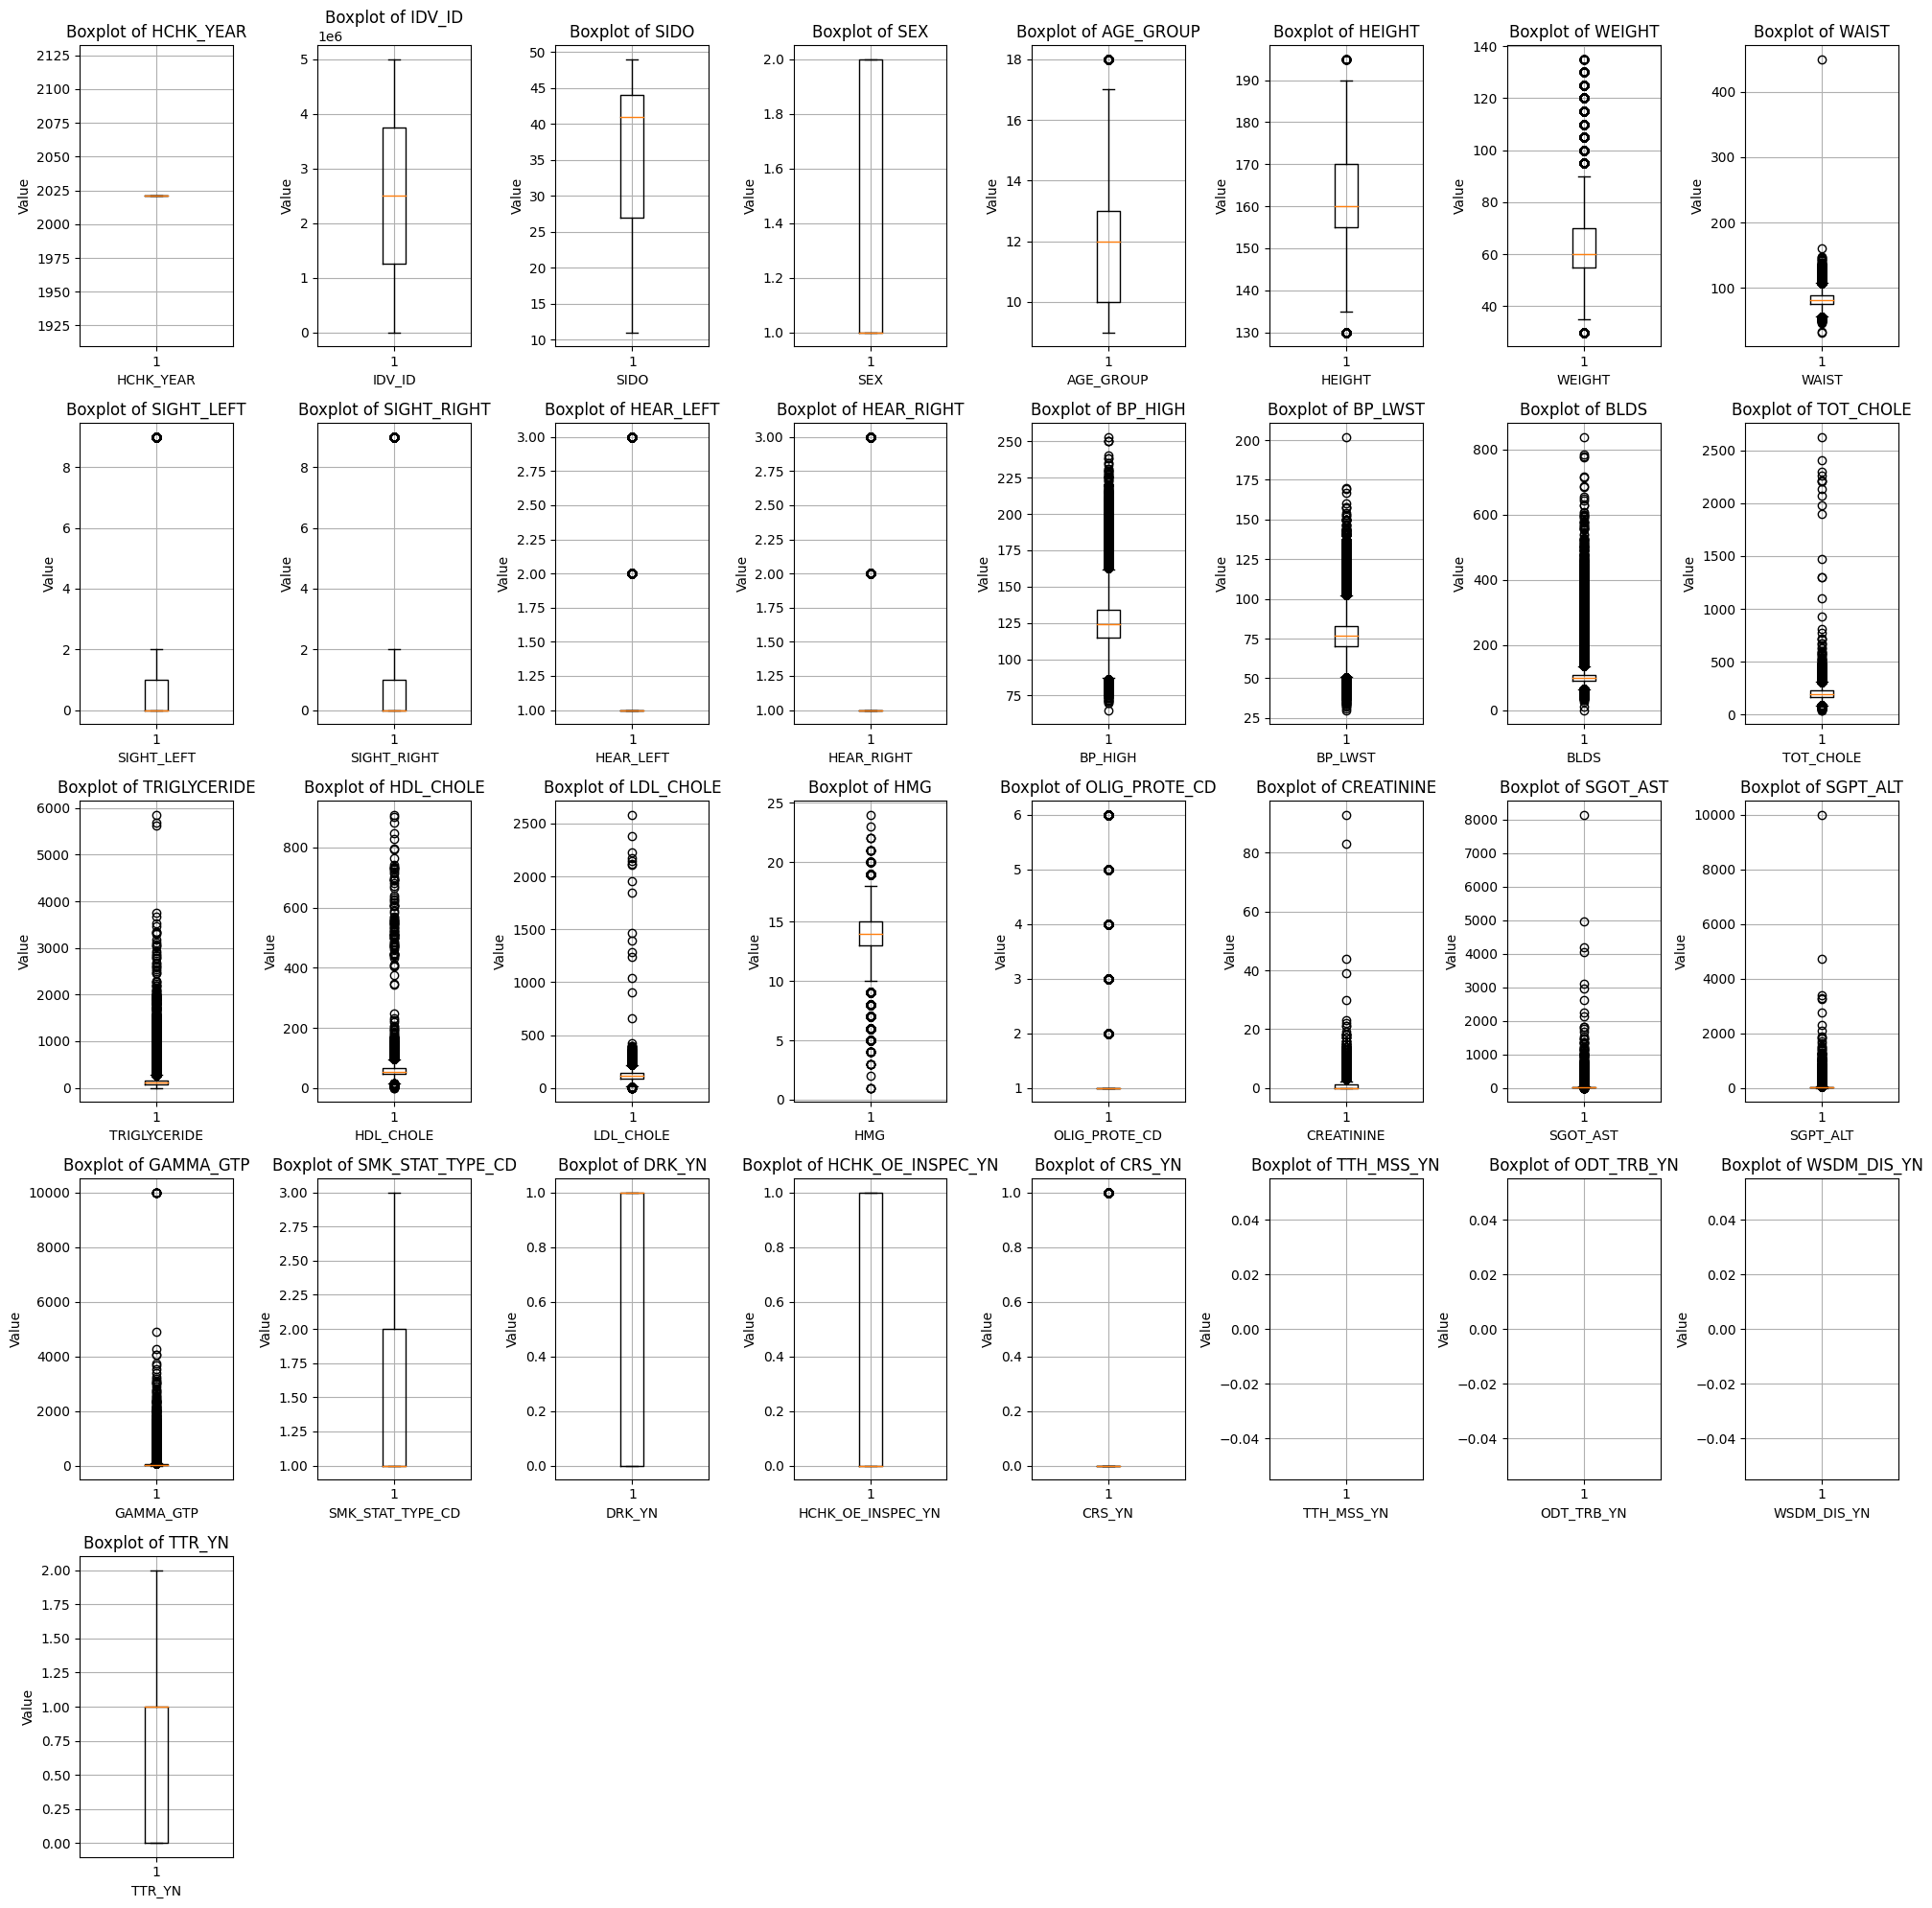

1.0    634160
2.0    182981
3.0    182489
Name: SMK_STAT_TYPE_CD, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'drive/MyDrive/국민건강보험공단_건강검진정보_20211231.csv'

df = pd.read_csv(file_path)

# 숫자형 열들에 대한 상자 그림(Boxplot) 그리기
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numeric_columns)
num_rows = (num_cols - 1) // 8 + 1  # 그래프를 나타낼 행의 수 계산

# 각 열의 평균과 중앙값 출력
for column in numeric_columns:
    mean_value = df[column].mean()
    median_value = df[column].median()
    print(f"Column: {column}")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print("----------------------")

plt.figure(figsize=(20, num_rows * 4))  # 전체 그래프의 크기 설정

for i, column in enumerate(numeric_columns, start=1):
    plt.subplot(num_rows, 8, i)  # 계산된 그리드에 따라 그래프 생성.
    plt.boxplot(df[column].dropna())  # 결측치가 있는 경우 제거 후 boxplot 생성.
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.grid(True)

plt.tight_layout()
plt.show()

        AGE_GROUP   BLDS  BP_HIGH  BP_LWST  CREATININE  CRS_YN  DRK_YN  \
574476         16  103.0    126.0     70.0         0.0     0.0     0.0   
574479          9  105.0    110.0     70.0         1.0     0.0     1.0   
574485         13   96.0    126.0     76.0         0.0     0.0     1.0   
574486         12   94.0    112.0     72.0         0.0     0.0     1.0   
574487         13  109.0    120.0     78.0         1.0     0.0     1.0   
...           ...    ...      ...      ...         ...     ...     ...   
999989         12   93.0     95.0     61.0         0.0     0.0     0.0   
999993         12  141.0    144.0     94.0         0.0     0.0     0.0   
999994          9  114.0    122.0     76.0         1.0     0.0     0.0   
999995         14  102.0    156.0     92.0         0.0     0.0     0.0   
999998         10  112.0    132.0     85.0         0.0     0.0     0.0   

        GAMMA_GTP  HCHK_OE_INSPEC_YN  HDL_CHOLE  ...  SGOT_AST  SGPT_ALT  \
574476       15.0                  

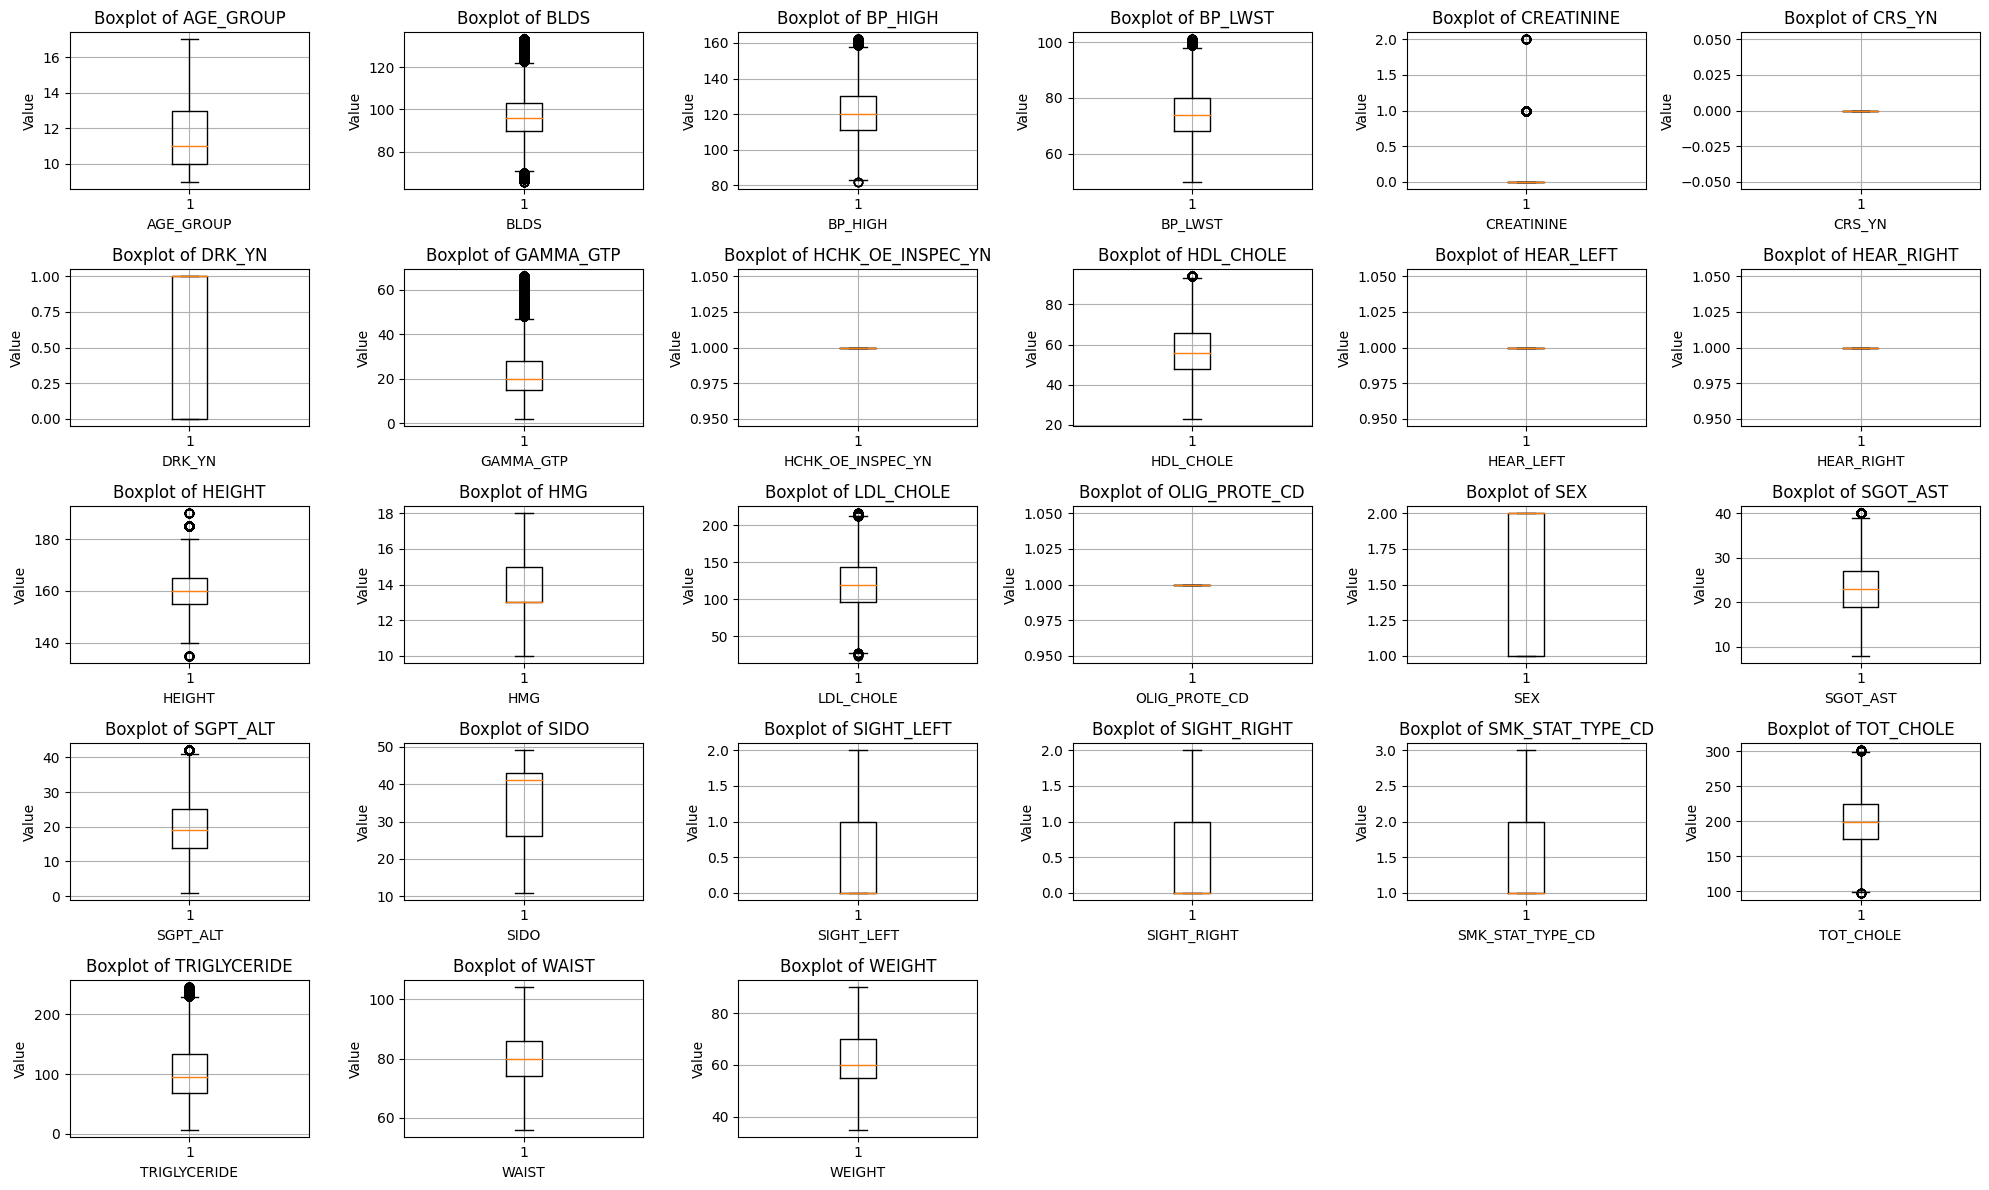

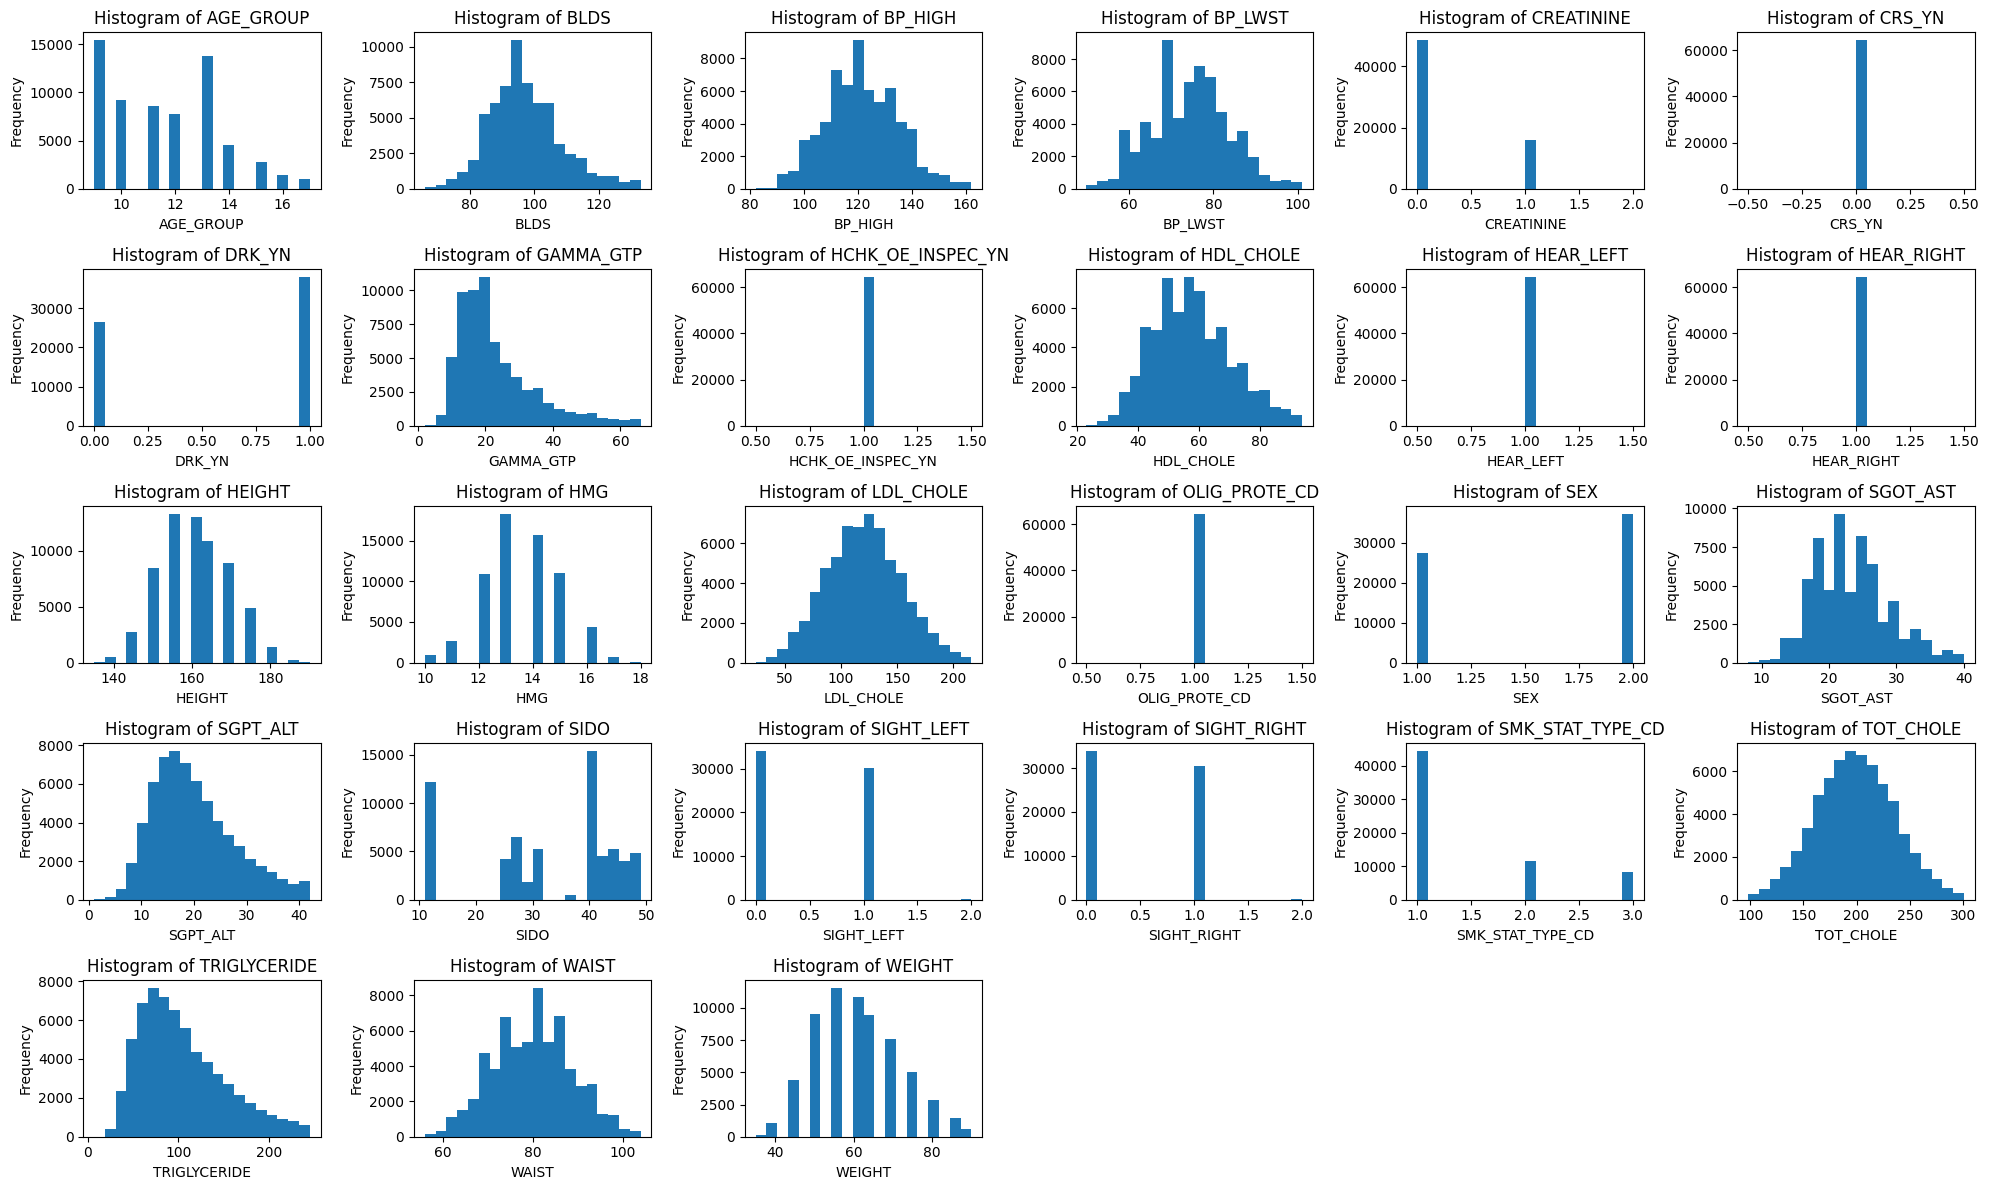

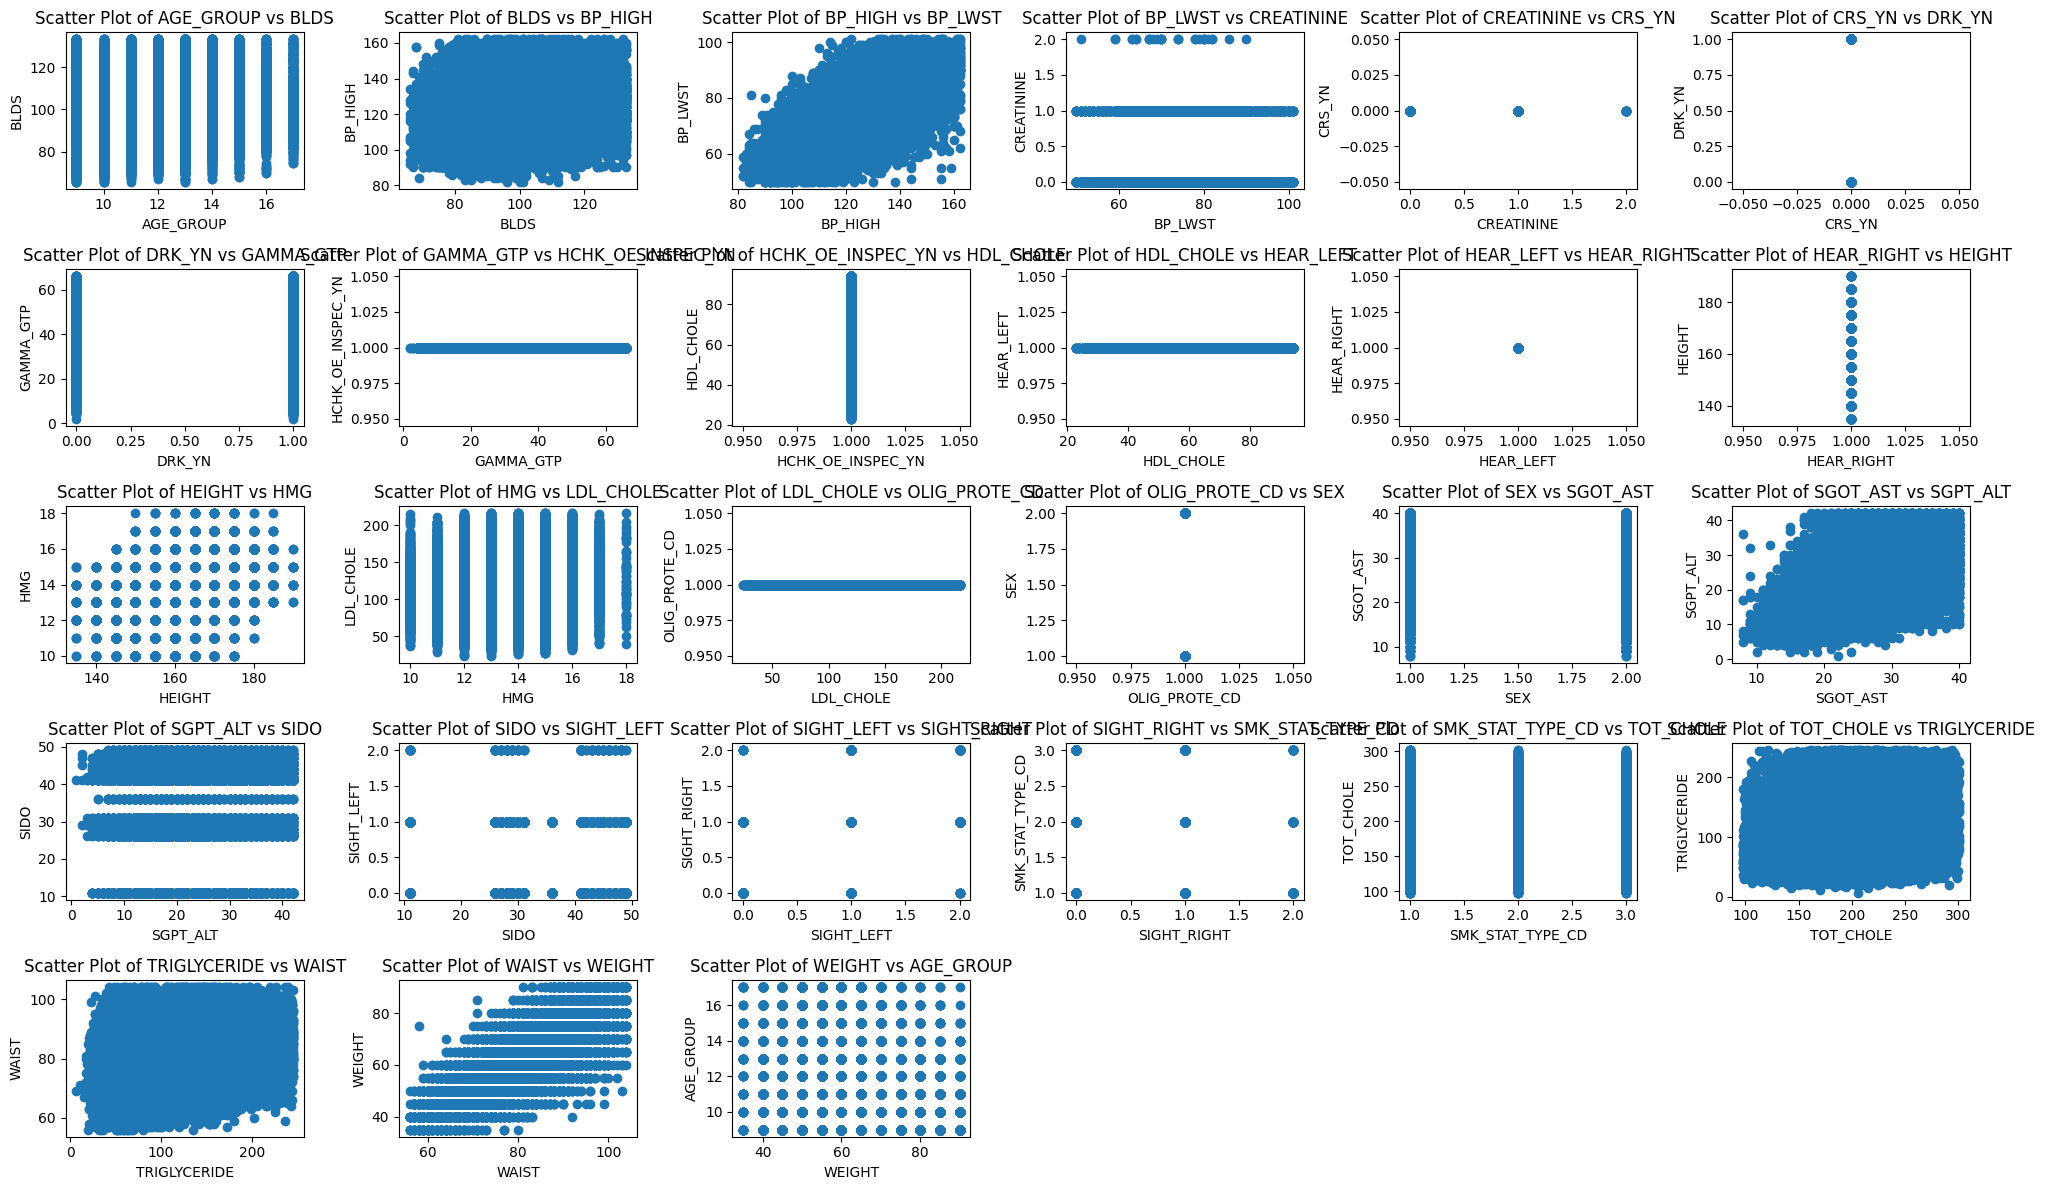

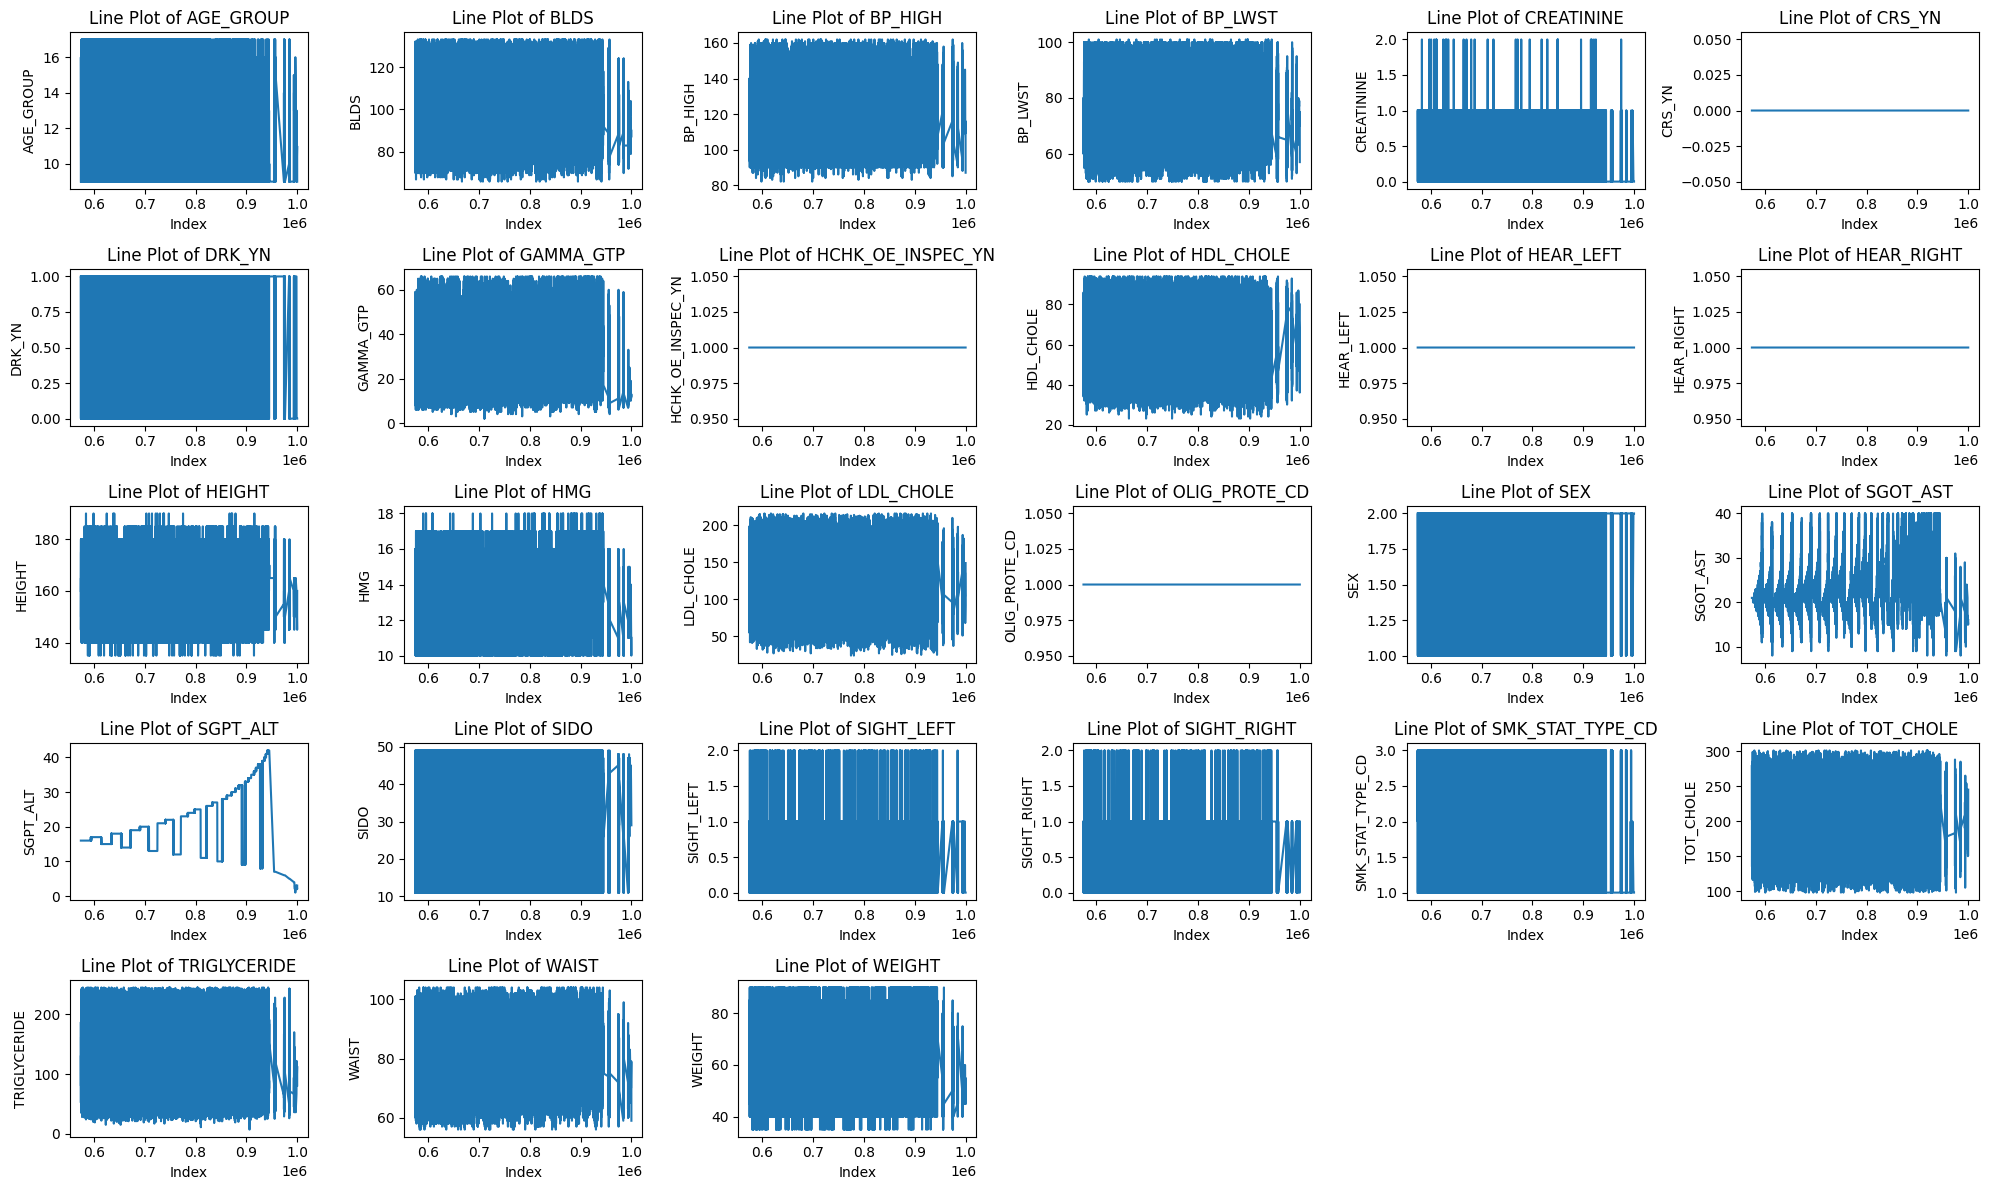

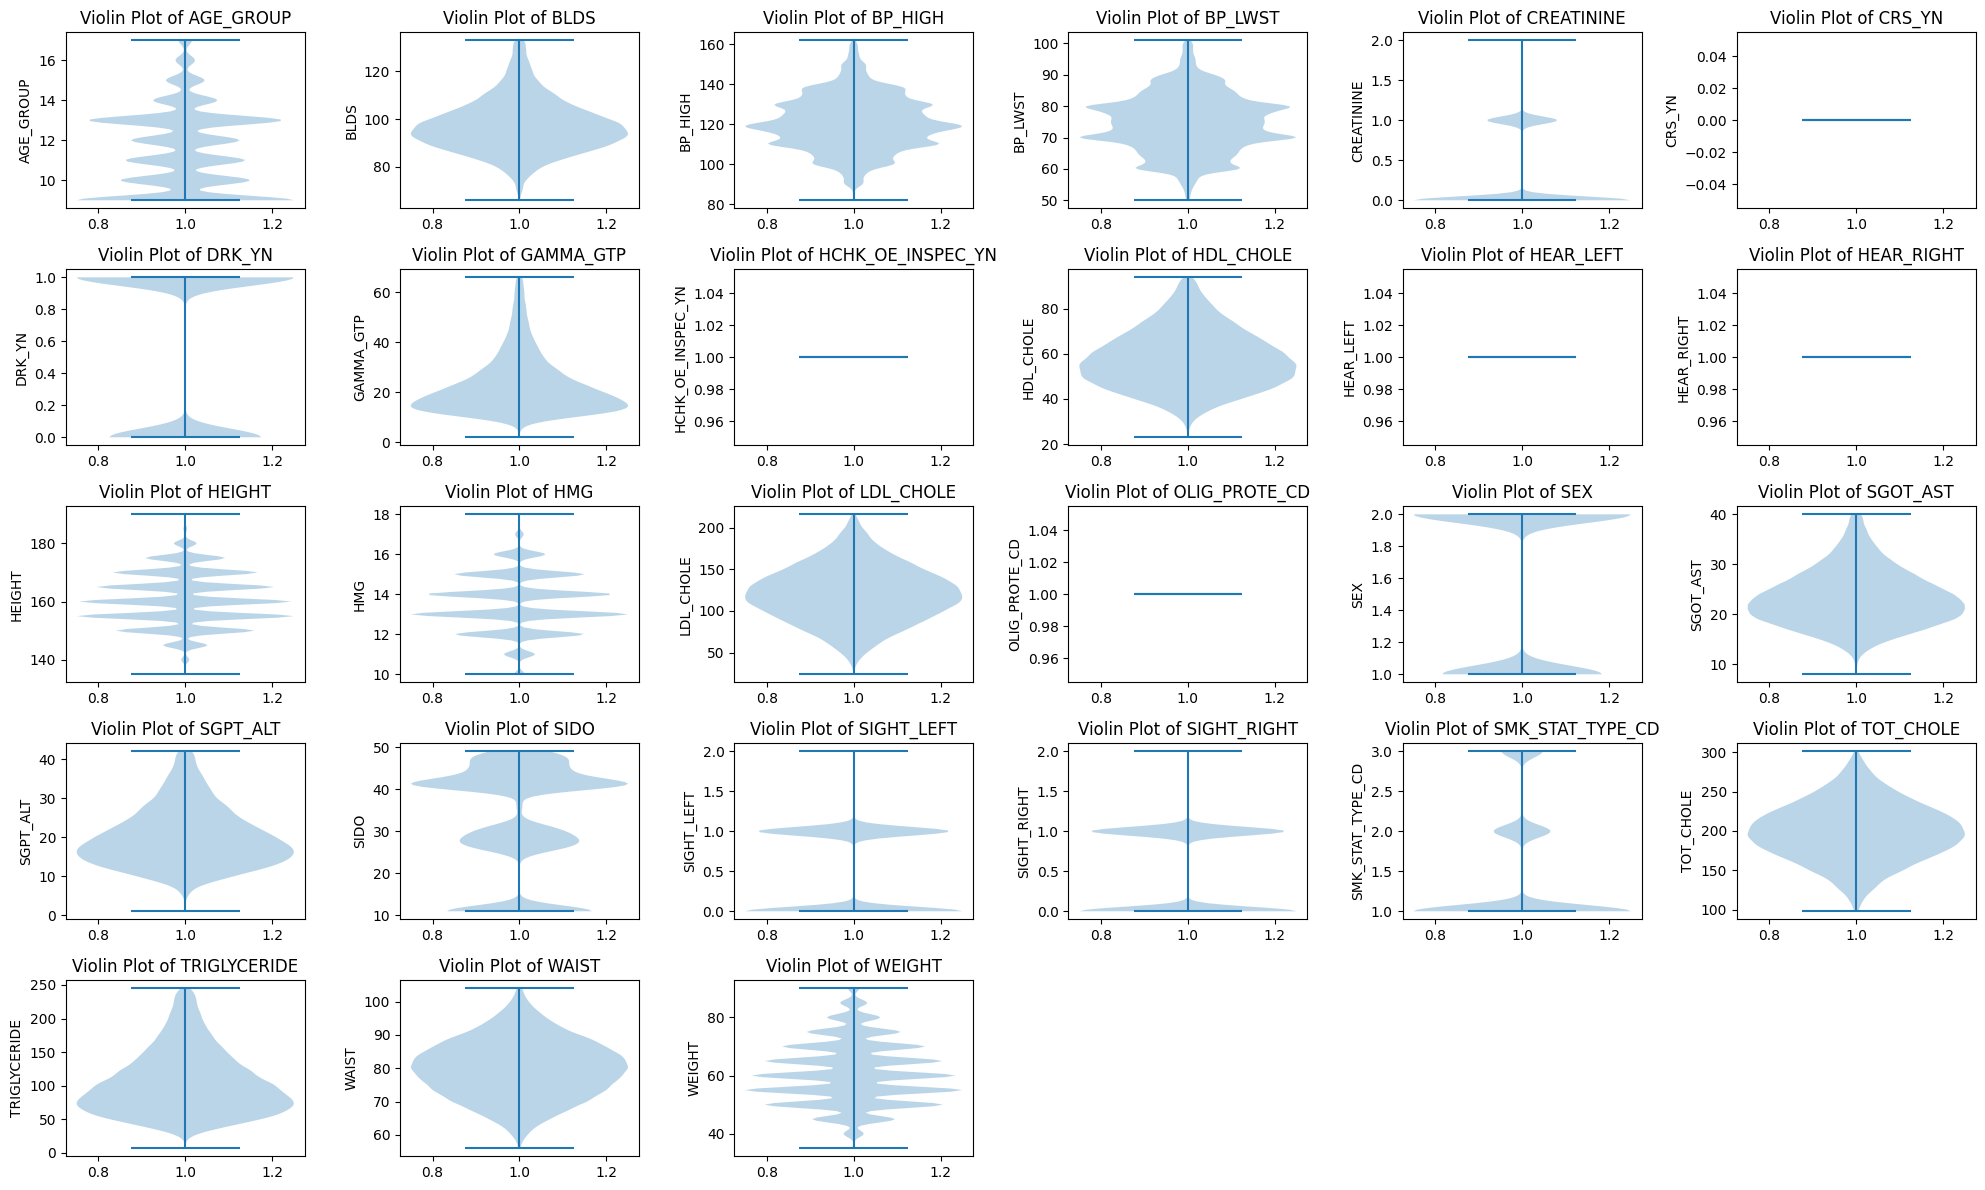

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'drive/MyDrive/국민건강보험공단_건강검진정보_20211231.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

# 제외할 열
exclude_columns = ["HCHK_YEAR", "IDV_ID", "TTR_YN", "DATA_STD_DT", "TTH_MSS_YN", "ODT_TRB_YN", "WSDM_DIS_YN"]

# 수치형 열에 대한 상자 그림(Boxplot) 그리기 전에 제외할 열 제거
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(exclude_columns)

# 새로운 DataFrame 생성
new_df = df[numeric_columns].copy()

# NaN 값을 가진 행 제거
new_df.dropna(inplace=True)

print(new_df)

# 수치형 열에 대해 IQR을 이용하여 이상치 제거
for column in numeric_columns:
    q1 = new_df[column].quantile(0.25)
    q3 = new_df[column].quantile(0.75)
    iqr = q3 - q1

    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr

    # 이상치 제거
    new_df = new_df[(new_df[column] >= lower_fence) & (new_df[column] <= upper_fence)]
print(new_df)
# Boxplot
plt.figure(figsize=(20, 12))
for i, column in enumerate(new_df.columns, start=1):
    plt.subplot(5, 6, i)
    plt.boxplot(new_df[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.grid(True)
plt.tight_layout()
plt.show()

# 히스토그램
plt.figure(figsize=(20, 12))
for i, column in enumerate(new_df.columns, start=1):
    plt.subplot(5, 6, i)
    plt.hist(new_df[column].dropna(), bins=20)  # 히스토그램 생성
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 산점도
plt.figure(figsize=(20, 12))
for i, column in enumerate(new_df.columns, start=1):
    plt.subplot(5, 6, i)
    plt.scatter(new_df[column].dropna(), new_df[new_df.columns[i % len(new_df.columns)]].dropna())  # 산점도 생성
    plt.title(f'Scatter Plot of {column} vs {new_df.columns[i % len(new_df.columns)]}')
    plt.xlabel(column)
    plt.ylabel(new_df.columns[i % len(new_df.columns)])
plt.tight_layout()
plt.show()

# 꺾은선 그래프
plt.figure(figsize=(20, 12))
for i, column in enumerate(new_df.columns, start=1):
    plt.subplot(5, 6, i)
    plt.plot(new_df[column].dropna())  # 꺾은선 그래프 생성
    plt.title(f'Line Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

# 바이올린 플롯
plt.figure(figsize=(20, 12))
for i, column in enumerate(new_df.columns, start=1):
    plt.subplot(5, 6, i)
    plt.violinplot(new_df[column].dropna())  # 바이올린 플롯 생성
    plt.title(f'Violin Plot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [4]:
new_df['SMK_STAT_TYPE_CD'].value_counts()

1.0    44486
2.0    11654
3.0     8391
Name: SMK_STAT_TYPE_CD, dtype: int64

#### nan값을 전부 제거하니 127417개의 row밖에 안남았고, iqr을 진행하니 64531개의 row 밖에 남지 않았다. 이후에 SMK_STAT_TYPE_CD 를 확인해보니

SMK_STAT_TYPE_CD가 1인 경우의 데이터 개수: 44486
SMK_STAT_TYPE_CD가 2인 경우의 데이터 개수: 11654
SMK_STAT_TYPE_CD가 3인 경우의 데이터 개수: 8391  --> 데이터 불균형
